## 3.1 The rrandom walk process

A *random walk* is a process in which there is an equal chance of going up or down by a random number. This is usually observed in financial and economic data, like the daily closing price of GOOGL. Random walks often expose long periods where a positive or negative trend can be observed. They are also often accompanied by sudden changes in direction.

In a random walk process, we say that the present value $y_t$ is a function of the value at the previous timestep $y_{t–1}$, a constant C, and a random number $\epsilon_t$, also termed white noise. Here, $\epsilon_t$ is the realization of the standard normal distribution, which has a variance of 1 and a mean of 0.

Therefore, we can mathematically express a random walk with the following equation, where $y_t$ is the value at the present time t, C is a constant, $y_{t–1}$ is the value at the previous timestep t–1, and $\epsilon_t$ is a random number.
<br/>
<center> $y_t = C + y_{t-1} + \epsilon_t$</center>

### 3.1.1 Simulating a random walk process

From equation 3.1, we know that a random walk depends on its previous value $y_{t-1}$ plus white noise $\epsilon_{t}$ and some constant C. To simplify our simulation, let’s assume that the constant C is 0. Again, for simplification, we will initialize our sequence at 0. This will be the value of $y_0$.

By initializing our random walk process at 0 and setting the constant C to 0, we determine that the value at time t is simply the sum of white noise from t = 1 to time t. Thus, our simulated random walk will respect the equation 3.6, where $y_t$ is the value of the random walk process at time t, and $\epsilon_{t}$ is a random number at time t.
<br/>
<center>$y_t = \sum_{t=1}^T \epsilon_t$</center>

We are now ready to simulate our random process using Python. In order for this exercise to be reproducible, we will need to set a seed, which is an integer that we pass to the `random.seed` method. That way, no matter how many times we run the code, the same random numbers will be generated.

Then we must decide on the length of our simulated process. For this exercise, we will generate 1,000 samples. The numpy library allows us to generate numbers from a normal distribution by using the `standard_normal` method. This ensures that the numbers come from a distribution with mean of 0, as per the definition of white noise; I’ve also given it a variance of 1 (a normal distribution). Then we can set the very first value of our series to 0.

Finally, the cumsum method will calculate the cumulative sum of white noise for each timestep in our series, and we will have simulated our random walk:

In [1]:
import numpy as np

np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)

We can plot our simulated random walk and see what it looks like. Since our x-axis and y-axis do not have a real-life meaning, we will simply label them as “timesteps” and “value,” respectively.

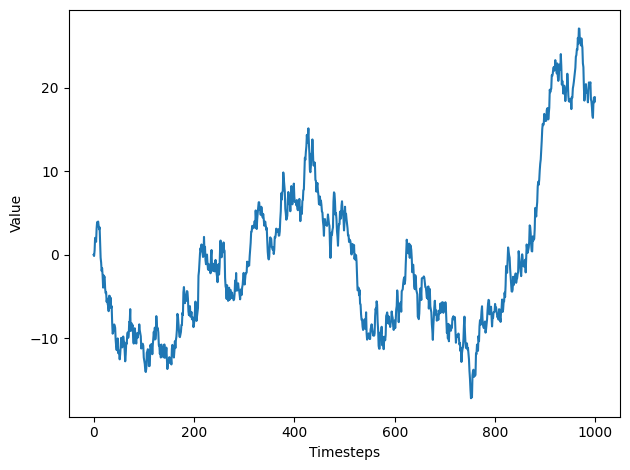

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

We know this is a random walk because we simulated it. However, when dealing with real-life data, we need to find a way to identify whether our time series is a random walk or not. Let’s see how we can achieve this.

## 3.2 Identifying a random walk

To determine if our time series can be approximated as a random walk or not, we must first define a random walk. In the context of time series, a random walk is defined as a series whose first difference is stationary and uncorrelated.
<br/>
<center><img src="https://i.imgur.com/hkNxjtU.png" alt="steps to identify a random walk" title="Steps to identify a random walk" /></center>

### 3.2.1 Stationarity

A stationary time series is one whose statistical properties do not change over time. In other words, it has a constant mean, variance, and autocorrelation, and these properties are independent of time.

We can view stationarity as an assumption that can make our lives easier when forecasting. Of course, we will rarely see a stationary time series in its original state because we are often interested in forecasting processes with a trend or with seasonal cycles. This is when models like ARIMA (chapter 7) and SARIMA (chapter 8) come into play.

For now, since we are still in the early stages of time series forecasting, we’ll focus on stationary time series, which means that we will need to find ways to transform our time series to make them stationary. A transformation is simply a mathematical manipulation of the data that stabilizes its mean and variance, thus making it stationary.

The simplest transformation one can apply is differencing. This transformation helps stabilize the mean, which in turn removes or reduces the trend and seasonality effects. Differencing involves calculating the series of changes from one timestep to another. To accomplish that, we simply subtract the value of the previous timestep $y_{t-1}$ from the value in the present $y_t$ to obtain the differenced value $y_t^'$.
<br/>
<center>$y_t^' = y_t - y_{t-1}$</center>

It is possible to difference a time series many times. Taking the difference once is applying a first-order differencing. Taking it a second time would be a second-order differencing. It is often not necessary to difference more than twice to obtain a stationary series.

While differencing is used to obtain a constant mean through time, we must also make sure we have a constant variance in order for our process to be stationary. Logarithms are used to help stabilize the variance.

Keep in mind that when we model a time series that has been transformed, we must untransform it to return the results of the model to the original units of measurement. The formal term for undoing a transformation is *inverse transform*.

### 3.2.2 Testing for stationarity

Once a transformation is applied to a time series, we need to test for stationarity to determine if we need to apply another transformation to make the time series stationary, or if we need to transform it at all. A common test is the augmented Dickey-Fuller (ADF) test.

The ADF test verifies the following null hypothesis: there is a unit root present in a time series. The alternative hypothesis is that there is no unit root, and therefore the time series is stationary. The result of this test is the ADF statistic, which is a negative number. The more negative it is, the stronger the rejection of the null hypothesis. In its implementation in Python, the p-value is also returned. If its value is less than 0.05, we can also reject the null hypothesis and say the series is stationary.

Let’s consider a very simple time series where the present value $y_t$ only depends on its past value $y_{t-1}$ subject to a coefficient α1, a constant C, and white noise $\epsilon_t$. We can write the following general expression:
<br/>
<center> $y_t = C + \alpha_1 y_{t-1} +\epsilon_t$</center>

This time series will be stationary only if the root lies within the unit circle. Therefore, its value must be between –1 and 1. Otherwise the series is non-stationary.

Let’s verify this by simulating two different series. One will be stationary and the other will have a unit root, meaning that it will not be stationary
<br/>
<center> $y_t = 0.5 y_{t-1} + \epsilon_t$</center>
<br/>
<center> $y_t = y_{t-1} + \epsilon_t$</center>

In first equation, the root of the series is 0.5. Since it is between –1 and 1, this series is stationary. On the other hand, in second equation, the root of the series is 1, meaning that it is a unit root. Therefore, we expect this series to be non-stationary.

By looking at both series in next figure, we can gain some intuition about how stationary and non-stationary series evolve through time. We can see that the non-stationary process has long periods of positive and negative trends. However, the stationary process does not seem to increase or decrease over the long term. This high-level qualitative analysis can help us intuitively determine if a series is stationary or not.
<br/>
<center><img src="https://i.imgur.com/Dat7hWM.png" alt="Stationary vs Non-Stationary Time Series" title="Stationary vs Non-Stationary Time Series" /></center>

Once we have a stationary series, we must determine whether there is autocorrelation or not. Remember that a random walk is a series whose first difference is stationary and uncorrelated. The ADF test takes care of the stationarity portion, but we’ll need to use the autocorrelation function to determine if the series is correlated or not.

### 3.2.3 The autocorrelation function

Once a process is stationary, plotting the autocorrelation function (ACF) is a great way to understand what type of process you are analyzing. In this case, we will use it to determine if we are studying a random walk or not.

We know that correlation measures the extent of a linear relationship between two variables. Autocorrelation therefore measures the linear relationship between lagged values of a time series. Thus, the ACF reveals how the correlation between any two values changes as the lag increases. Here, the lag is simply the number of timesteps separating two values.

When we plot the ACF function, the coefficient is the dependent variable, while the lag is the independent variable. Note that the autocorrelation coefficient at lag 0 will always be equal to 1. This makes sense intuitively, because the linear relationship between a variable and itself at the same timestep should be perfect, and therefore equal to 1.

In the presence of a trend, a plot of the ACF will show that the coefficients are high for short lags, and they will decrease linearly as the lag increases. If the data is seasonal, the ACF plot will also display cyclical patterns. Therefore, plotting the ACF function of a non-stationary process will not give us more information than is available by looking at the evolution of our process through time. However, plotting the ACF for a stationary process can help us identify the presence of a random walk.

### 3.2.4 Putting it all together

The first step is to determine whether our random walk is stationary or not. We know that since there are visible trends in our sequence, it is not stationary. Nevertheless, let’s apply the ADF test to make sure. We will use the `statsmodels library`, which is a Python library that implements many statistical models and tests. To run the ADF test, we simply pass it our array of simulated data. The result is a list of different values, but we are mainly interested in the first two: the ADF statistic and the p-value.

In [3]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


This prints an ADF statistic of –0.97 and a p-value of 0.77. The ADF statistic is not a large negative number, and with a p-value greater than 0.05, we cannot reject the null hypothesis stating that our time series is not stationary. We can further support our conclusion by plotting the ACF function.

The statsmodels library conveniently has a function to quickly plot the ACF. Again, we can simply pass it our array of data. We can optionally specify the number of lags, which will determine the range on the x-axis. In this case, we will plot the first 20 lags.

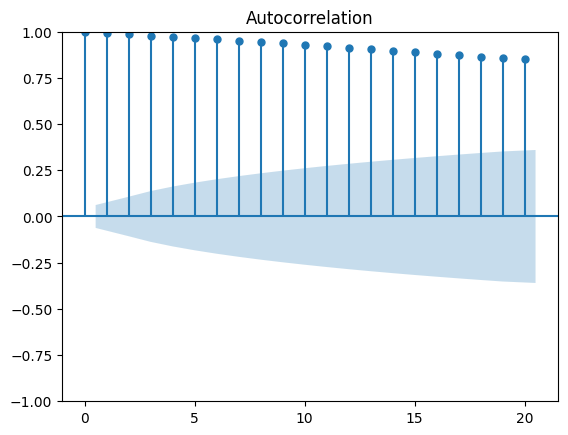

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=20);

In last figure the autocorrelation coefficients slowly decrease as the lag increases, which is a clear indicator that our random walk is not a stationary process. Note that the shaded area represents a confidence interval. If a point is within the shaded area, then it is not significantly different from 0. Otherwise, the autocorrelation coefficient is significant.

Because our random walk is not stationary, we need to apply a transformation to make it stationary in order to retrieve useful information from the ACF plot. Since our sequence mostly displays changes in the trend without seasonal patterns, we will apply a first-order differencing. Remember that we’ll lose the first data point every time we difference.

To difference, we will use the numpy method `diff`. This will difference a given array of data. The n parameter controls how many times the array must be differenced. To apply a first-order differencing, the n parameter must be set to 1:

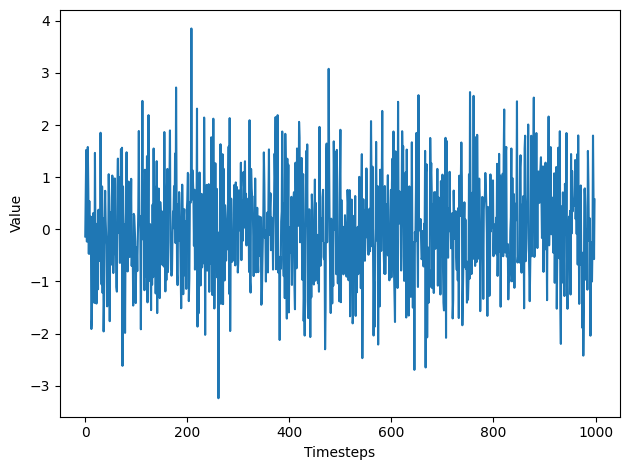

In [5]:
diff_random_walk = np.diff(random_walk, n=1)

fig, ax = plt.subplots()

ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()



we have removed the trend from our series. Furthermore, the variance looks quite stable. Let’s test for stationarity again, using the ADF test:

In [6]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560594
p-value: 0.0


This prints out an ADF statistic of –31.79 with a p-value of 0. This time the ADF statistic is a large negative number, and the p-value is less than 0.05. Therefore, we reject the null hypothesis, and we can say that this process has no unit root and is thus stationary. We can now plot the ACF function of our newly stationary series:

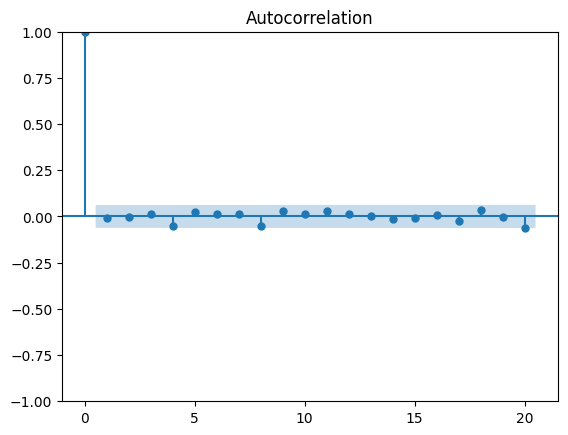

In [7]:
plot_acf(diff_random_walk, lags=20);

Looking at last figure, we notice that there are no significant autocorrelation coefficients after lag 0. This means that the stationary process is completely random and can therefore be described as white noise. Each value is simply a random step away from the previous one, with no relation between them.

### Is GOOGL a random walk?

Taking the
closing price of GOOGL from April 27, 2020, to April 27, 2021, from finance.yahoo.com, let’s determine whether the process can be approximated as a random walk or not.

You can load the data in a DataFrame using the read_csv method from pandas:

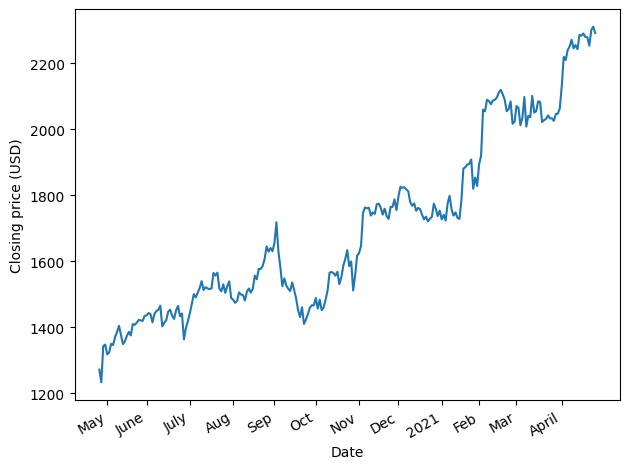

In [8]:
import pandas as pd

df = pd.read_csv('GOOG.csv')

fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 2021, 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

Looking at figure, we can see a trend in the data as the closing price is increasing over time; therefore, we do not have a stationary process. This is further supported by the ADF test:

In [9]:
GOOGL_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.16025048664771302
p-value: 0.9699419435913057


This returns an ADF statistic of 0.16 and a p-value greater than 0.05, so we know that our data is not stationary. Hence, we will difference our data to see if that makes it stationary:

In [10]:
diff_close = np.diff(df['Close'], n=1)

GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295234
p-value: 5.3865309614545585e-06


This gives an ADF statistic of –5.3 and a p-value smaller than 0.05, meaning that we have a stationary process.

Now we can plot the ACF function and see if there is autocorrelation:

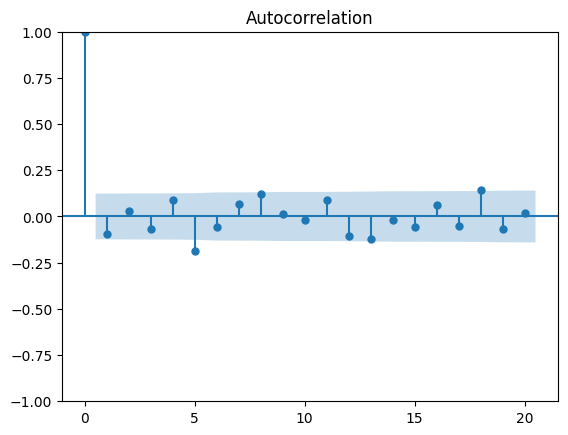

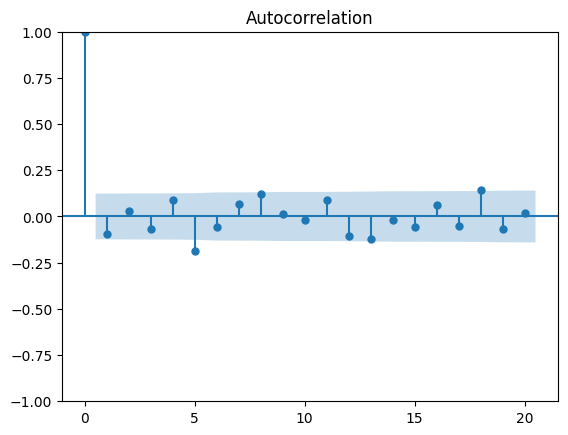

In [11]:
plot_acf(diff_close, lags=20)

We do not see any significant coefficients, except at lags 5 and 18. This situation can arise sometimes, and it is due to chance only. In such a situation, we can safely assume that the coefficients at lags 5 and 18 are not significant, because we do not have consecutive significant coefficients. It just happened by chance that the differenced values are slightly correlated with the ones at lags 5 and 18.

>Therefore, we can conclude that the closing price of GOOGL can be approximated by a random walk process. Taking the first difference makes the series stationary, and its ACF plot shows no autocorrelation, meaning that it is purely random.

## 3.3 Forecasting a random walk

Predicting a random change is impossible, unless we predict a random value ourselves, which is not ideal. In this case, we can only use naive forecasting methods, or baselines, which we covered in chapter 2. Since the values change randomly, no statistical learning model can be applied. Instead, we can only reasonably predict the historical mean, or the last value.

Depending on the use case, your forecasting horizon will vary. Ideally, when dealing with a random walk, you will only forecast the next timestep. However, you may be required to forecast many timesteps into the future. Let’s look at how to tackle each of these situations.

### 3.3.1 Forecasting on a long horizon

In this section, we’ll forecast a random walk on a long horizon. This is not an ideal case: a random walk can unexpectedly increase or decrease because past observations are not predictive of changes in the future.

To make things easier, we will assign the random walk to a DataFrame and split the dataset into train and test sets. The train set will contain the first 800 timesteps, which corresponds to 80% of the simulated data. The test set will thus contain the last 200 values

In [12]:
df = pd.DataFrame({'value': random_walk})

train = df[:800]
test = df[800:]

As mentioned, we can only use naive forecasting methods for this situation, since we are dealing with a random walk. In this case, we will use the historical mean, the last known value, and the drift method.

Forecasting the mean is fairly straightforward. We’ll simply calculate the mean of the train set and say that the next 200 timesteps will be equal to that value. Here, we’ll create a new column pred_mean that will hold the historical mean as a prediction:

In [13]:
mean = np.mean(train.value)

test.loc[:, 'pred_mean'] = mean

test.head()

/home/sandra/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


You will get a historical mean of –3.68. This means that we’ll forecast that the next 200 timesteps of our simulated random walk will have a value of –3.68.

Another possible baseline is to predict the last known value of the train set. Here, we’ll simply extract the last value of the train set and assign its value as our prediction for the next 200 timesteps:

In [15]:
last_value = train.iloc[-1].value
test.loc[:, 'pred_last'] = last_value

test.head()

/home/sandra/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


Finally, we’ll apply the drift method, which we have not covered yet. The drift method is a modification of predicting the last known value. In this case, we allow the values to increase or decrease over time. The rate at which values will change in the future is equal to that seen in the train set. Therefore, it is equivalent to calculating the slope between the first and last value of the train set and simply extrapolating this straight line into the future.

Remember that we can calculate the slope of a straight line by dividing the change in the y-axis by the change in the x-axis. In our case, the change in the y-axis is the difference between the last value of our random walk yf and its initial value yi. Then, the change in the x-axis is equivalent to the number of timesteps minus 1.
<br/>
<center>$slope = \frac{\Delta_y}{\Delta_x} = \frac{y_f - y_i}{T - 1}$</center>

We calculated the last value of the train set when we implemented the last known value baseline, and we know that the initial value of our simulated random walk is 0; therefore, we can plug the numbers into equation and calculate the drift
<br/>
<center>$drift = \frac{-6.81 - 0}{800 - 1} = -0.0085$</center>

Let’s implement this in Python now. We will calculate the change in the x-axis and the y-axis, and simply divide them to obtain the drift:

In [18]:
deltaX = 800 - 1
deltaY = last_value - 0

drift = deltaY / deltaX
print(drift)

-0.008529346056640632


As expected, this gives us a drift of –0.0085, which means that the values of our forecasts will slowly decrease over time. The drift method simply states that the value of our forecast is linearly dependent on the timestep, the value of the drift, and the initial value of our random walk. Keep in mind that our random walk starts at 0, so we can remove that from equation.
<br/>
<center>$forecast = drift$ x $timestep + y_i$</center>
<br/>
<center>$forecast = drift$ x $timestep$</center>

Since we want to forecast the next 200 timesteps following the train set, we’ll first create an array containing the range of timesteps starting at 800 and ending at 1000 with a step of 1. Then we simply multiply each timestep by the drift to get our forecast values.

Finally, we assign them to the pred_drift column of test:

In [20]:
x_vals = np.arange(800, 1000, 1)

pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift
test.head()

/home/sandra/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.823477
801,-6.392708,-3.677206,-6.814947,-6.832006
802,-6.296588,-3.677206,-6.814947,-6.840536
803,-6.758863,-3.677206,-6.814947,-6.849065
804,-7.193359,-3.677206,-6.814947,-6.857594


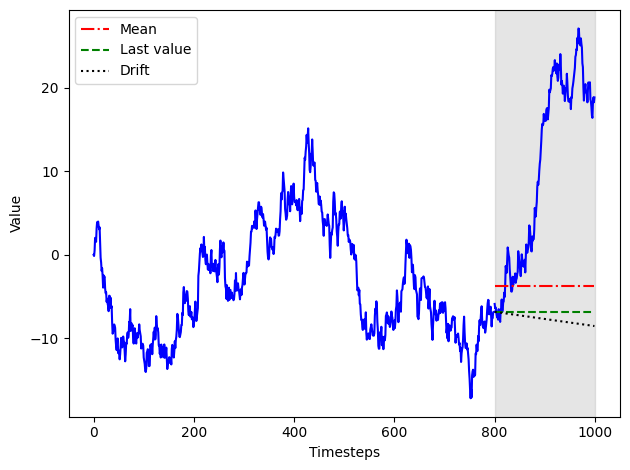

In [21]:
fig, ax = plt.subplots()
ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

We can further demonstrate that by calculating the mean squared error (MSE) of our forecasts. We cannot use the MAPE, as in chapter 2, because our random walk can take the value 0: it is impossible to calculate the percentage difference from an observed value of 0 because that implies a division by 0, which is not allowed in mathematics.

Therefore, we opt for the MSE, as it can measure the quality of the fit of a model, even if the observed value is 0. The sklearn library has a mean_squared_error function that simply needs the observed and predicted values. It will then return the MSE.

In [22]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

326.50277395297474 425.1726033055617 465.9076036601397


As you can see, the best forecast was obtained by predicting the historical mean, and yet the MSE exceeds 300. This is an extremely high value considering that our simulated random walk does not exceed the value of 30.

Forecasting a random walk on a long horizon does not make sense. Since the future value is dependent on the past value plus a random number, the randomness portion is magnified in a long horizon where many random numbers are added over the course of many timesteps.

### 3.3.2 Forecasting the next timestep

Forecasting the next timestep of a random walk is the only reasonable situation we can tackle, although we will still use naive forecasting methods. Specifically, we will predict the last known value. However, we will make this forecast only for the next timestep. That way, our forecast should only be off by a random number, since the future value of a random walk is always the past value plus white noise.

Implementing this method is straightforward: we take our initial observed value and use it to predict the next timestep. Once we record a new value, it will be used as a forecast for the following timestep. This process is then repeated into the future.

For the sake of illustrating this method, we will apply it over the entire random walk. This naive forecast can look deceptively amazing, when we are actually only predicting the last known value at each timestep.

A good way to simulate this process is by shifting our data, and the pandas library has a shift method that does exactly what we want. We simply pass in the number of periods, which in our case is 1, since we are forecasting the next timestep:

In [23]:
df_shift = df.shift(periods=1)

df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


You will notice that at step 1, the value is 0, which corresponds to the observed value at step 0 in the simulated random walk. Therefore, we are effectively using the present observed value as a forecast for the next timestep. Plotting our forecast yields NEXT figure .

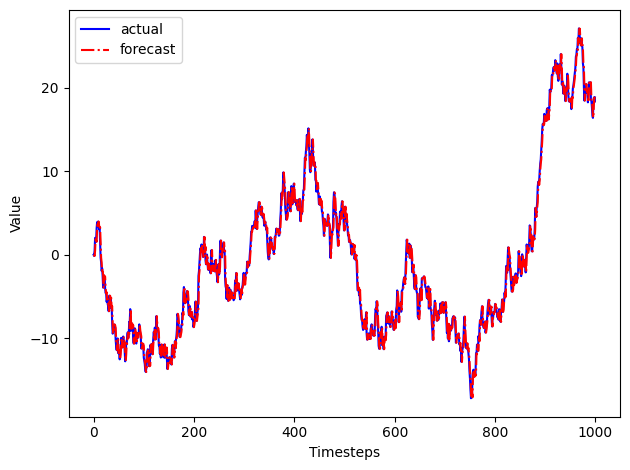

In [24]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

Looking at figure, you might think that we have developed an amazing model that is almost a perfect fit to our data. It seems that we do not have two separate lines in the graph, since both of them almost perfectly overlap, which is a sign of a perfect fit. Now, we can calculate the MSE:

In [25]:
mse_one_step = mean_squared_error(test['value'], df_shift[800:])

print(mse_one_step)

0.9256876651440581


This yields a value of 0.93, which again might lead us to think that we have a very performant model, since the MSE is very close to 0. However, we know that we are simply forecasting the value observed at the previous timestep.

Therefore, if a random walk process must be forecast, it is better to make many short-term forecasts. That way, we do not allow for many random numbers to accumulate over time, which will degrade the quality of our forecasts in the long term.

Because a random process takes random steps into the future, we cannot use statistical or deep learning techniques to fit such a process: there is nothing to learn from randomness and it cannot be predicted. Instead, we must rely on naive forecasting methods.